In [67]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2

import matplotlib.pyplot as plt
from six.moves import urllib
import zipfile
from scipy import stats

In [68]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '624bc4e1-3ea7-4a94-93f3-4f3f3e4c45fa'
resource_group = 'erspc-test-resource-group'
workspace_name = 'DryRunMLWorkspace'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='ais-with-larger-geospatial-limit')
ais_reporting_rates = dataset.to_pandas_dataframe()


In [69]:
#checking the first 5 records in the data
ais_reporting_rates.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
0,9428086,11223344,2020-03-12 17:21:26,50.423552,-0.580688,254.0,12.7,Under way using engine,None,N/A
1,9429453,11223344,2020-03-12 17:26:44,50.419567,-0.609708,260.0,12.6,Under way using engine,None,N/A
2,9430776,11223344,2020-03-12 17:31:22,50.416072,-0.635027,260.0,13.1,Under way using engine,None,N/A
3,9432046,11223344,2020-03-12 17:36:45,50.411950,-0.664525,260.0,13.0,Under way using engine,None,N/A
4,9433162,11223344,2020-03-12 17:42:02,50.407778,-0.693447,260.0,13.0,Under way using engine,None,N/A


In [70]:
#checking the last 5 records in the data
ais_reporting_rates.tail()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
368944,11479752,710032130,2020-03-20 20:42:00,50.306265,-1.157915,257.0,13.0,Under way sailing,ANGRA DOS REIS_BRA,Tanker
368945,11480956,710032130,2020-03-20 20:56:41,50.294537,-1.239870,257.0,13.2,Under way sailing,ANGRA DOS REIS_BRA,Tanker
368946,11481903,710032130,2020-03-20 21:00:41,50.291395,-1.262475,257.0,13.5,Under way sailing,ANGRA DOS REIS_BRA,Tanker
368947,11482991,710032130,2020-03-20 21:06:40,50.286498,-1.296945,257.0,13.7,Under way sailing,ANGRA DOS REIS_BRA,Tanker
368948,11484116,710032130,2020-03-20 21:12:03,50.282047,-1.328098,257.0,13.8,Under way sailing,ANGRA DOS REIS_BRA,Tanker


In [71]:
ais_reporting_rates.shape

(368949, 10)

In [72]:
# #checking the columns
ais_reporting_rates.columns

Index(['message_id', 'mmsi', 'message_time_stamp', 'lat', 'lon', 'heading',
       'sog', 'status', 'destination', 'vessel_type'],
      dtype='object')

In [73]:
# check unique vessel_type
ais_reporting_rates["vessel_type"].unique()

array(['N/A', 'Search And Rescue', 'Vessel', 'Tanker', 'Cargo',
       'Wing In Ground-effect', 'Passenger', 'Tug', 'Law Enforcement',
       'High Speed Craft'], dtype=object)

In [74]:
# select tug from ais_reporting_rates
select_tug = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'Tug']
select_tug.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
42185,4872600,220581000,2020-02-27 01:29:26,50.060955,-1.482018,76.0,5.4,Under way using engine,DK EBJ,Tug
42186,4873678,220581000,2020-02-27 01:34:16,50.063183,-1.471420,77.0,5.2,Under way using engine,DK EBJ,Tug
42187,4874733,220581000,2020-02-27 01:39:36,50.065442,-1.460170,79.0,4.9,Under way using engine,DK EBJ,Tug
42188,4875898,220581000,2020-02-27 01:44:45,50.067558,-1.449750,80.0,4.8,Under way using engine,DK EBJ,Tug
42189,4877085,220581000,2020-02-27 01:49:35,50.069582,-1.439963,80.0,4.9,Under way using engine,DK EBJ,Tug


In [75]:
select_tug.shape

(1313, 10)

In [76]:
# select Vessel from ais_reporting_rates
select_vessel = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'Vessel']
select_vessel.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
656,7159586,205059000,2020-03-05 12:13:09,49.726305,-0.297062,135.0,10.2,Engaged in fishing,HOME,Vessel
657,7160920,205059000,2020-03-05 12:19:29,49.713280,-0.278175,135.0,10.2,Engaged in fishing,HOME,Vessel
658,9267847,205059000,2020-03-12 05:24:38,49.753125,-0.407357,140.0,4.3,Engaged in fishing,HOME,Vessel
659,9269037,205059000,2020-03-12 05:29:19,49.747920,-0.403150,137.0,4.6,Engaged in fishing,HOME,Vessel
660,9281219,205059000,2020-03-12 06:30:52,49.694217,-0.309612,132.0,3.8,Engaged in fishing,HOME,Vessel


In [77]:
select_vessel.shape

(43235, 10)

In [78]:
# select Tanker from ais_reporting_rates
select_tanker = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'Tanker']
select_tanker.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
9716,796163,205366000,2020-02-13 02:18:33,50.405007,-0.509652,252.0,13.4,Under way using engine,MONTOIR,Tanker
9717,797284,205366000,2020-02-13 02:23:52,50.399578,-0.539855,251.0,13.8,Under way using engine,MONTOIR,Tanker
9718,798466,205366000,2020-02-13 02:28:28,50.394938,-0.566318,251.0,13.8,Under way using engine,MONTOIR,Tanker
9719,799667,205366000,2020-02-13 02:33:56,50.389322,-0.598083,250.0,13.9,Under way using engine,MONTOIR,Tanker
9720,800928,205366000,2020-02-13 02:38:33,50.384413,-0.624985,250.0,13.9,Under way using engine,MONTOIR,Tanker


In [79]:
# select Search And Rescue from ais_reporting_rates
select_search_and_rescue = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'Search And Rescue']
select_search_and_rescue.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
649,11420222,111232533,2020-03-20 16:00:43,50.436197,-0.818347,76.3,62.0,N/A,None,Search And Rescue
650,11421615,111232533,2020-03-20 16:07:22,50.444643,-0.746983,232.2,10.0,N/A,None,Search And Rescue
651,11422809,111232533,2020-03-20 16:12:03,50.442142,-0.766278,256.4,9.0,N/A,None,Search And Rescue
652,11424033,111232533,2020-03-20 16:17:13,50.439643,-0.788652,262.1,10.0,N/A,None,Search And Rescue
653,11425149,111232533,2020-03-20 16:21:51,50.437240,-0.808268,252.9,10.0,N/A,None,Search And Rescue


In [80]:
# select Cargo from ais_reporting_rates
select_cargo = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'Cargo']
select_cargo.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
9912,1130109,205439000,2020-02-14 04:53:27,49.731933,-0.435420,143.0,8.6,Under way using engine,BE ANR_FR URO,Cargo
9913,1131338,205439000,2020-02-14 04:58:48,49.720943,-0.425573,140.0,8.7,Under way using engine,BE ANR_FR URO,Cargo
9914,1132600,205439000,2020-02-14 05:03:27,49.711340,-0.416870,140.0,8.6,Under way using engine,BE ANR_FR URO,Cargo
9915,1133840,205439000,2020-02-14 05:07:57,49.701975,-0.408578,139.0,8.6,Under way using engine,BE ANR_FR URO,Cargo
9916,1135058,205439000,2020-02-14 05:13:27,49.690483,-0.398583,139.0,8.6,Under way using engine,BE ANR_FR URO,Cargo


In [81]:
# select Passenger from ais_reporting_rates
select_passenger = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'Passenger']
select_passenger.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
19732,11793278,209952000,2020-03-22 02:30:29,50.387083,-0.521268,233.0,23.2,Under way using engine,DUBLIN,Passenger
19733,11794339,209952000,2020-03-22 02:35:49,50.372903,-0.569853,257.0,23.0,Under way using engine,DUBLIN,Passenger
19734,11795546,209952000,2020-03-22 02:40:29,50.367902,-0.616153,262.0,23.2,Under way using engine,DUBLIN,Passenger
19735,11796673,209952000,2020-03-22 02:45:49,50.362618,-0.669155,262.0,23.2,Under way using engine,DUBLIN,Passenger
19736,11797891,209952000,2020-03-22 02:50:30,50.358125,-0.715908,262.0,23.3,Under way using engine,DUBLIN,Passenger


In [82]:
# select Law Enforcement from ais_reporting_rates
select_law_enforcement = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'Law Enforcement']
select_law_enforcement.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
57729,612858,227800900,2020-02-12 13:33:42,50.444643,-0.756473,234.0,8.3,Under way using engine,None,Law Enforcement
57730,614256,227800900,2020-02-12 13:38:28,50.436553,-0.764735,217.0,8.2,Under way using engine,None,Law Enforcement
57731,615524,227800900,2020-02-12 13:43:47,50.427315,-0.773625,211.0,6.5,Under way using engine,None,Law Enforcement
57732,616858,227800900,2020-02-12 13:48:26,50.419360,-0.781303,227.0,6.2,Under way using engine,None,Law Enforcement
57733,618166,227800900,2020-02-12 13:53:42,50.410163,-0.790302,223.0,8.2,Under way using engine,None,Law Enforcement


In [83]:
# select High Speed Craft from ais_reporting_rates
select_high_speed_craft = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'High Speed Craft']
select_high_speed_craft.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
60667,4732051,228251700,2020-02-26 14:44:11,50.414837,-0.975273,221.8,29.7,Under way sailing,HORIZON,High Speed Craft
60668,4733412,228251700,2020-02-26 14:48:49,50.391033,-1.012040,221.1,28.6,Under way sailing,HORIZON,High Speed Craft
60669,4734615,228251700,2020-02-26 14:54:10,50.363667,-1.053755,222.3,27.3,Under way sailing,HORIZON,High Speed Craft
60670,4735906,228251700,2020-02-26 14:58:49,50.340677,-1.089478,218.1,28.5,Under way sailing,HORIZON,High Speed Craft
60671,4737134,228251700,2020-02-26 15:04:16,50.313250,-1.129913,222.6,26.3,Under way sailing,HORIZON,High Speed Craft


In [84]:
# select Wing In Ground-effect from ais_reporting_rates
select_wing_in_ground_effect = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'Wing In Ground-effect']
select_wing_in_ground_effect.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
16537,11275438,209414000,2020-03-20 04:26:29,50.424288,-0.584878,254.0,8.7,Under way using engine,GB PTL,Wing In Ground-effect
16538,11276412,209414000,2020-03-20 04:32:28,50.420297,-0.606597,253.0,8.6,Under way using engine,GB PTL,Wing In Ground-effect
16539,11277641,209414000,2020-03-20 04:37:48,50.416872,-0.626012,254.0,8.6,Under way using engine,GB PTL,Wing In Ground-effect
16540,11278856,209414000,2020-03-20 04:42:29,50.413883,-0.643017,254.0,8.5,Under way using engine,GB PTL,Wing In Ground-effect
16541,11280005,209414000,2020-03-20 04:46:29,50.411335,-0.657427,254.0,8.5,Under way using engine,GB PTL,Wing In Ground-effect


In [85]:
# select N/A from ais_reporting_rates
select_not_available = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'N/A']
select_not_available.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
0,9428086,11223344,2020-03-12 17:21:26,50.423552,-0.580688,254.0,12.7,Under way using engine,None,N/A
1,9429453,11223344,2020-03-12 17:26:44,50.419567,-0.609708,260.0,12.6,Under way using engine,None,N/A
2,9430776,11223344,2020-03-12 17:31:22,50.416072,-0.635027,260.0,13.1,Under way using engine,None,N/A
3,9432046,11223344,2020-03-12 17:36:45,50.411950,-0.664525,260.0,13.0,Under way using engine,None,N/A
4,9433162,11223344,2020-03-12 17:42:02,50.407778,-0.693447,260.0,13.0,Under way using engine,None,N/A


In [86]:
select_tug = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'Tug']
select_tug.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
42185,4872600,220581000,2020-02-27 01:29:26,50.060955,-1.482018,76.0,5.4,Under way using engine,DK EBJ,Tug
42186,4873678,220581000,2020-02-27 01:34:16,50.063183,-1.471420,77.0,5.2,Under way using engine,DK EBJ,Tug
42187,4874733,220581000,2020-02-27 01:39:36,50.065442,-1.460170,79.0,4.9,Under way using engine,DK EBJ,Tug
42188,4875898,220581000,2020-02-27 01:44:45,50.067558,-1.449750,80.0,4.8,Under way using engine,DK EBJ,Tug
42189,4877085,220581000,2020-02-27 01:49:35,50.069582,-1.439963,80.0,4.9,Under way using engine,DK EBJ,Tug


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
import zipfile
from scipy import stats

select_tug = ais_reporting_rates.loc[ais_reporting_rates["vessel_type"] == 'Tug']
select_tug.head()

,message_id,mmsi,message_time_stamp,lat,lon,heading,sog,status,destination,vessel_type
42185,4872600,220581000,2020-02-27 01:29:26,50.060955,-1.482018,76.0,5.4,Under way using engine,DK EBJ,Tug
42186,4873678,220581000,2020-02-27 01:34:16,50.063183,-1.471420,77.0,5.2,Under way using engine,DK EBJ,Tug
42187,4874733,220581000,2020-02-27 01:39:36,50.065442,-1.460170,79.0,4.9,Under way using engine,DK EBJ,Tug
42188,4875898,220581000,2020-02-27 01:44:45,50.067558,-1.449750,80.0,4.8,Under way using engine,DK EBJ,Tug
42189,4877085,220581000,2020-02-27 01:49:35,50.069582,-1.439963,80.0,4.9,Under way using engine,DK EBJ,Tug


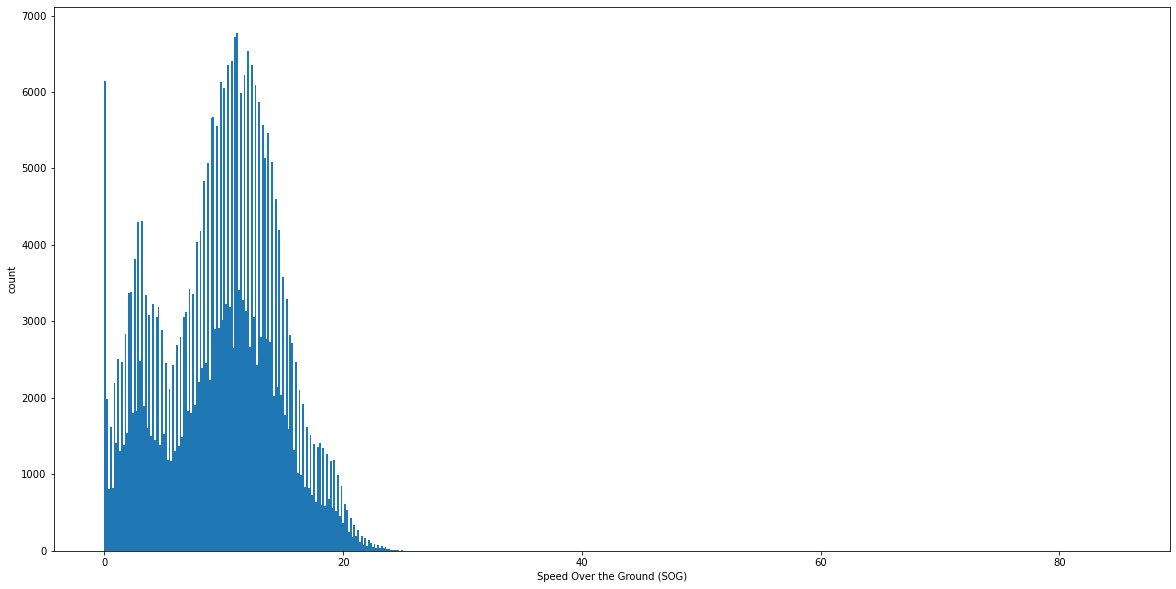

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
import zipfile
from scipy import stats

plt.hist(ais_reporting_rates['sog'], bins=554)
plt.xlabel('Speed Over the Ground (SOG)')
plt.ylabel('count')
plt.show()

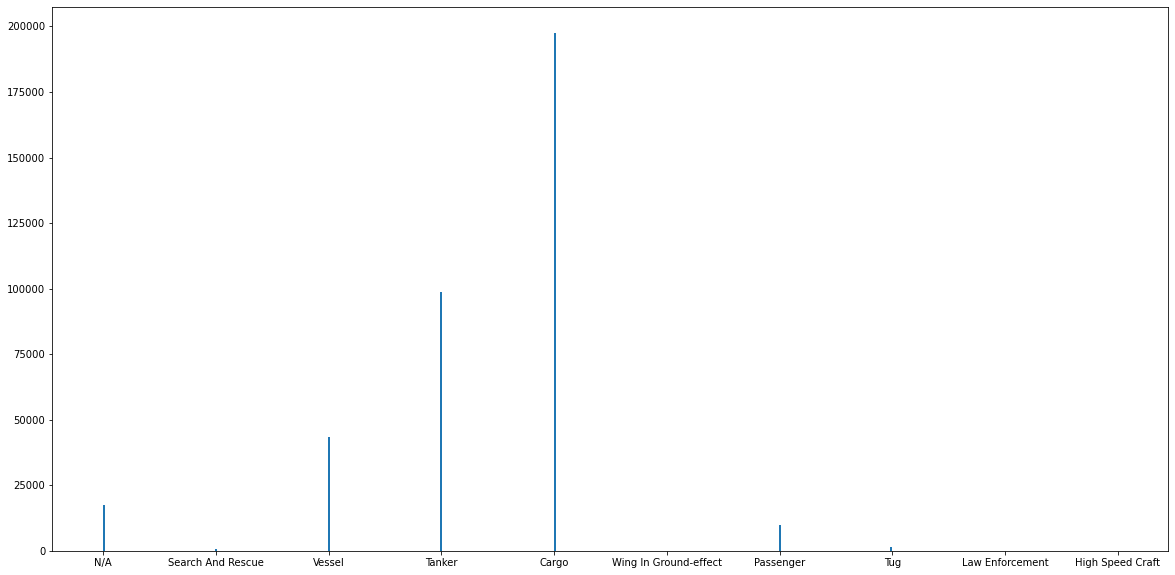

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
import zipfile
from scipy import stats

plt.hist(ais_reporting_rates['vessel_type'], bins=500)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [91]:
dist = getattr(stats, 'norm')
parameters = dist.fit(ais_reporting_rates['sog'])
print(parameters)

(9.688055530710203, 4.923945566668117)


In [92]:
stats.kstest(ais_reporting_rates['sog'], "norm", parameters)

KstestResult(statistic=0.053520742661188836, pvalue=0.0)

In [93]:
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']
#%%capture --no-stdout
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(ais_reporting_rates['sog'])
    a = stats.kstest(ais_reporting_rates['sog'], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2961: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 726.6.
  RuntimeWarning)
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2961: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 657.4.
  RuntimeWarning)
/anaconda/envs/azureml_py36/

alpha: statistic=0.06608608365729518, pvalue=0.0
anglit: statistic=0.3437484249226266, pvalue=0.0
arcsine: statistic=0.6698973547475763, pvalue=0.0
beta: statistic=0.0533527045496795, pvalue=0.0
betaprime: statistic=0.055019050469072156, pvalue=0.0
bradford: statistic=0.37510358391653964, pvalue=0.0
burr: statistic=0.10431642158214127, pvalue=0.0
burr12: statistic=0.05290854944952307, pvalue=0.0
cauchy: statistic=0.09123410465083304, pvalue=0.0
chi: statistic=0.053060768361671146, pvalue=0.0
chi2: statistic=0.06681883482065842, pvalue=0.0
cosine: statistic=0.2548876234285441, pvalue=0.0
dgamma: statistic=0.07529345010243663, pvalue=0.0
dweibull: statistic=0.06789320491364303, pvalue=0.0
erlang: statistic=0.053242676543903494, pvalue=0.0
expon: statistic=0.22937076862694683, pvalue=0.0
exponnorm: statistic=0.053574632700178745, pvalue=0.0
exponweib: statistic=0.08193259107867146, pvalue=0.0
exponpow: statistic=0.7124647781775115, pvalue=0.0
f: statistic=0.4487123645568799, pvalue=0.0
fa